In [1]:
#general imports
import numpy as np

#tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [2]:
#preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
#define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
#choose the number of time steps
n_steps = 3
#split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
X, y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]),
 array([146, 158, 172, 187, 196, 210]))

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# we are trying to convert a 2 dimensional array to a 3 dimensional array
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

### Building LSTM Model

In [9]:
#instansiate in deep learning includes two steps
#define the model model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
#compile the model
model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 32889.5352
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 32572.8496
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 32272.6152
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 31982.8750
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 31695.0879
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 31410.5176
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 31124.6270
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 30851.1016
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 30548.6250
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 30204.7969
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 29807.7090
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 29353.2324
Ep

Epoch 200/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.8425
Epoch 201/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.8171
Epoch 202/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.8009
Epoch 203/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.7899
Epoch 204/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.7673
Epoch 205/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.7441
Epoch 206/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.7285
Epoch 207/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.7105
Epoch 208/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.6855
Epoch 209/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6603
Epoch 210/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.6391
Epoch 211/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.6178
Epoch 212/1000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.3120
Epoch 401/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3096
Epoch 402/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3072
Epoch 403/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3064
Epoch 404/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3044
Epoch 405/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3020
Epoch 406/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3005
Epoch 407/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2991
Epoch 408/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2972
Epoch 409/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2954
Epoch 410/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2942
Epoch 411/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2922
Epoch 412/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.2196
Epoch 602/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2187
Epoch 603/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 604/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2175
Epoch 605/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2172
Epoch 606/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2167
Epoch 607/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2158
Epoch 608/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2156
Epoch 609/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2152
Epoch 610/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2142
Epoch 611/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2140
Epoch 612/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2137
Epoch 613/1000
1/1 [====================

Epoch 803/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1638
Epoch 804/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1715
Epoch 805/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1615
Epoch 806/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1581
Epoch 807/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1642
Epoch 808/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1567
Epoch 809/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1528
Epoch 810/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1586
Epoch 811/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 812/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1479
Epoch 813/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1528
Epoch 814/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1495
Epoch 815/1000
1/1 [=======

### Predicting for the next 10 days

In [11]:
#demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lstm_output = []
i = 0

while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(y_hat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        lstm_output.append(y_hat[0][0])
        i = i + 1
    
print(lstm_output)

[222.52008, 231.34393, 245.57076, 255.93732, 265.96793, 279.43127, 288.85703, 300.12582, 312.34192, 322.0]


### Visualising the output

In [12]:
import matplotlib.pyplot as plt

In [13]:
known_days = np.arange(1,10)
predicted_days = np.arange(10,20)

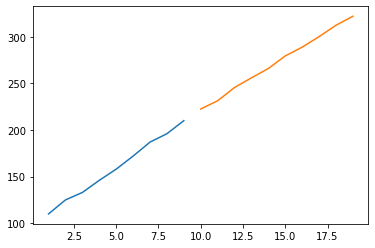

In [15]:
plt.plot(known_days, timeseries_data)
plt.plot(predicted_days,lstm_output)